# Kernel Smoothing

Kernel Smoothing is a regression technique that estimates a given input by nearby weighted values according to some kernel distance function. For a gaussian kernel it is defined as:

$$ K(x_*, x) = e^{\frac{(x_*-x)^2}{\sigma ^2}}$$

With the full formula for a prediction being:

$$\hat y (x) = \frac{\sum_{i=1}^{N}K(x, x_i)y(x_i)}{\sum_{i=1}^{N}K(x, x_i)}$$

In [88]:
# to make this notebook's output stable across runs
import numpy as np
np.random.seed(42)

In [82]:
X = 2 * np.random.rand(30,1)
y = np.random.randn(30,1)
X_add = np.linspace(2,4,30).reshape(-1,1)
y_add = 2+np.random.randn(30,1)


X = np.vstack((X, X_add))
y = np.vstack((y, y_add))

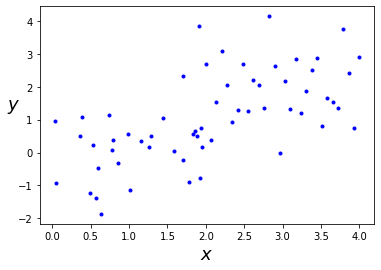

In [83]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

Now if we fit on the model above we get:

In [84]:
def pred(x):
    weightedSum = 0
    totalSum = 0
    for i in range(len(X)):
        weightedSum += K(x, X[i]) * y[i]
        totalSum += K(x, X[i])
    f = weightedSum[0]/totalSum
    return f

In [85]:
import math

def K(xStar, x): 
    k = math.exp(-((xStar-x)**2)/0.1)
    return k

In [86]:
vfunc = np.vectorize(pred)

x_plot = np.linspace(0,4,60)
y_pred = [pred(i) for i in x_plot]

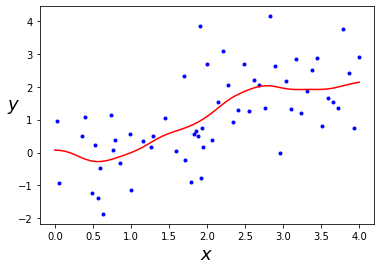

In [87]:
plt.plot(X, y, "b.")

plt.plot(x_plot, y_pred, "r")

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

Nice curve!

# Nearest Neighbor Smoother

Another method to find a regression curve is to take the average value of the m nearest points. Since our data is already sorted this gives us:

In [194]:
def NNpred(xi, m):
    distances = (abs(X-xi)).T[0]
    idx = np.argsort(distances)[:m]
    values = [y[i][0] for i in idx]
    return sum(values)/len(values)

In [197]:
y_pred2 = [NNpred(i,3) for i in x_plot]

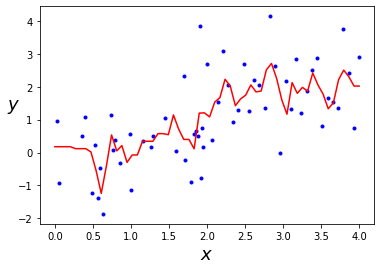

In [196]:
plt.plot(X, y, "b.")

plt.plot(x_plot2, y_pred2, "r")

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

As we see above the plot is not very smooth however we can increase the number of nearby neighbors to get:

In [202]:
y_pred3 = [NNpred(i,25) for i in x_plot]

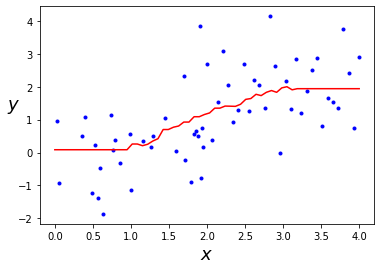

In [203]:
plt.plot(X, y, "b.")

plt.plot(x_plot2, y_pred3, "r")

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

## Kernel Average Smoother

To extend upon the two topics covered above they can also be combined so that kernel smoothing is done only based on the nearest neighbors which is called the kernel average smoothing. 

## Local Linear Regression

Additionally, instead of taking the mean of each set of neighboring points as is done with the nearest neighbor smoother a line can be fit through them instead which gives an even more accurate regression curve.